<a href="https://colab.research.google.com/github/PhilippaUdi/AgricAI/blob/main/Yam_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
import os
import matplotlib.pyplot as plt


In [3]:
# Load the InceptionV3 model pre-trained on ImageNet
base_model = InceptionV3(
    weights='imagenet',         # Use weights pre-trained on ImageNet
    include_top=False,          # Exclude the fully connected layers
    input_shape=(224, 224, 3)   # Define the input image size
)

# Freeze the base model to retain pre-trained weights during initial training
base_model.trainable = False


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.models import load_model

In [3]:
!ls /content

sample_data


In [4]:
from google.colab import files
uploaded = files.upload()


Saving inception_v3_weights_tf_dim_ordering_tf_kernels (1).h5 to inception_v3_weights_tf_dim_ordering_tf_kernels (1).h5


In [7]:
!ls /content


'inception_v3_weights_tf_dim_ordering_tf_kernels (1).h5'   sample_data


In [8]:
from tensorflow.keras.applications import InceptionV3


In [9]:
model = InceptionV3(weights=None, include_top=False, input_shape=(224, 224, 3))

In [10]:
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [11]:
from google.colab import files
uploaded = files.upload()


Saving yam_dataset.zip to yam_dataset.zip


In [12]:
import zipfile

# Specify the path of your uploaded file
zip_file_path = '/content/yam_dataset.zip'  # Adjust the name if needed

# Destination folder where the contents of the zip file will be extracted
extract_folder = '/content/yam_dataset/'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File extracted to: {extract_folder}")


File extracted to: /content/yam_dataset/


In [13]:
import os

# Check the contents of the extracted folder
extracted_files = os.listdir(extract_folder)
print(extracted_files)


['yam_dataset']


In [16]:
import os

# Path to the yam_dataset folder
image_folder_path = '/content/yam_dataset/'

# List the files in the yam_dataset folder to verify that images have been extracted
files = os.listdir(image_folder_path)

# Display the first few files to check if images are present
print(files[:10])  # Display the first 10 files

['yam_dataset']


In [17]:
# Check the folder structure to see if there are subfolders containing the images
subfolders = [f for f in os.listdir(image_folder_path) if os.path.isdir(os.path.join(image_folder_path, f))]
print(subfolders)

['yam_dataset']


In [20]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the yam_dataset folder
image_folder_path = '/content/yam_dataset/'

# Get a list of all files and directories in the main folder
all_items = os.listdir(image_folder_path)

# Filter to keep only files (not directories) and those with image extensions
image_files = [
    item
    for item in all_items
    if os.path.isfile(os.path.join(image_folder_path, item))
    and item.lower().endswith((".jpg", ".jpeg", ".png", ".gif"))  # Add other image extensions as needed
]

# Display the first 10 images
for i in range(min(10, len(image_files))):
    image_path = os.path.join(image_folder_path, image_files[i])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(image_files[i])  # Display the file name as the title
    plt.show()

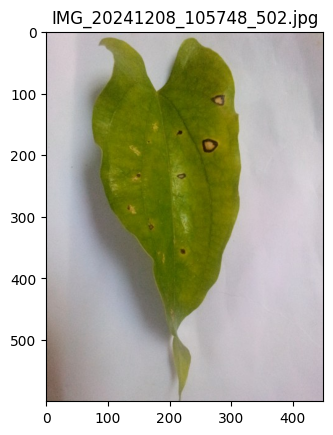

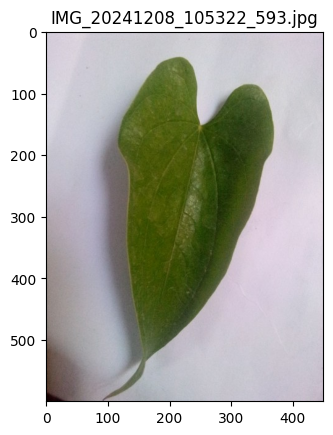

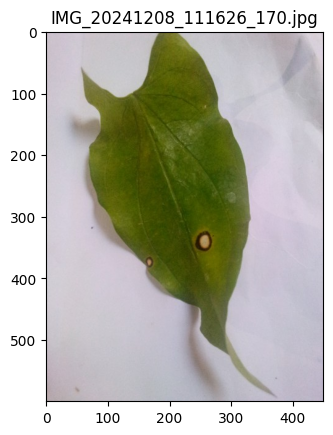

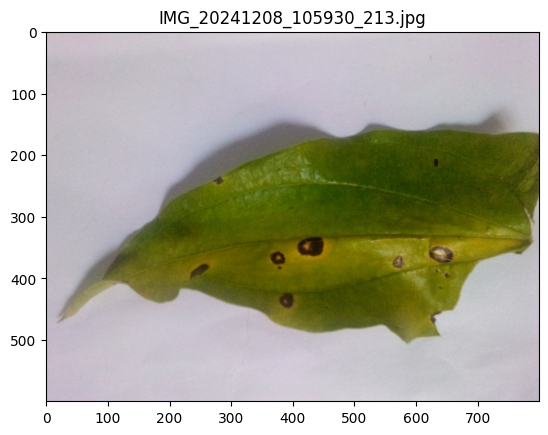

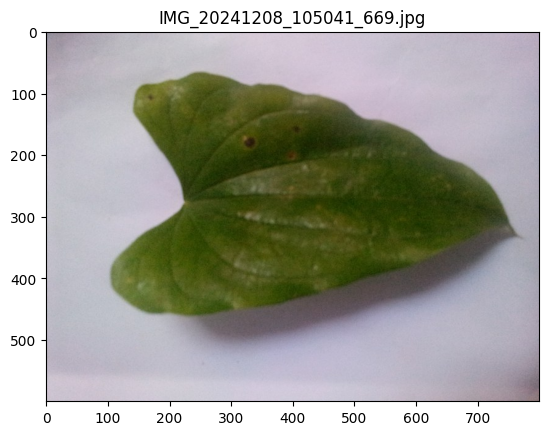

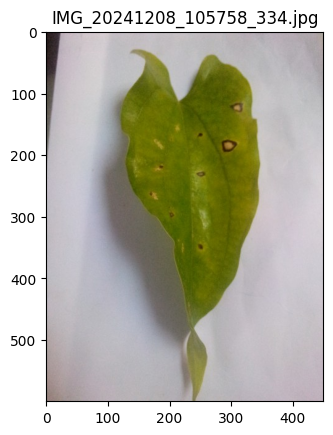

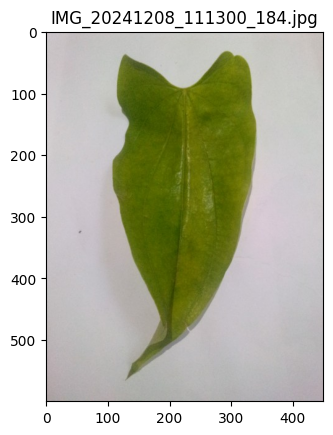

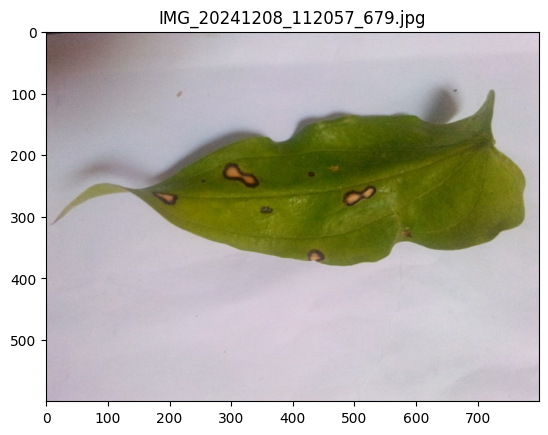

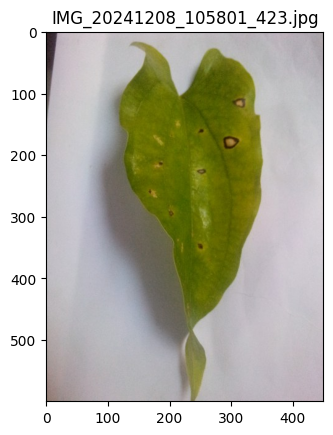

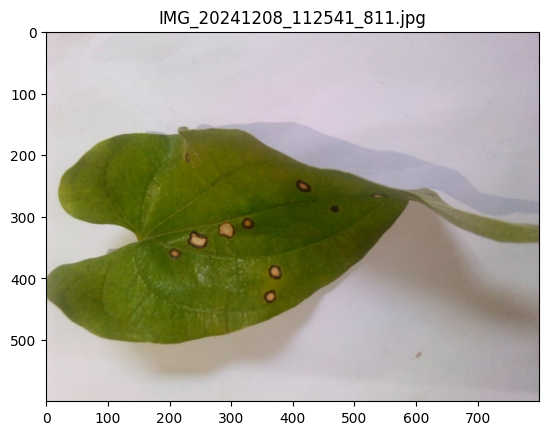

In [22]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the yam_dataset folder (including the nested subfolder)
image_folder_path = '/content/yam_dataset/yam_dataset/'  # Updated path

# Get a list of all files and directories in the main folder
all_items = os.listdir(image_folder_path)

# Filter to keep only files (not directories) and those with image extensions
image_files = [
    item
    for item in all_items
    if os.path.isfile(os.path.join(image_folder_path, item))
    and item.lower().endswith((".jpg", ".jpeg", ".png", ".gif"))  # Add other image extensions as needed
]

# Display the first 10 images
for i in range(min(10, len(image_files))):
    image_path = os.path.join(image_folder_path, image_files[i])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(image_files[i])  # Display the file name as the title
    plt.show()

In [21]:
!ls /content/yam_dataset/

yam_dataset


In [23]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image

# --- Paths to your image folders ---
healthy_folder = '/content/yam_dataset/healthy/'
diseased_folder = '/content/yam_dataset/Diseased/'

# --- Load the InceptionV3 model ---
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model weights

# --- Function to load and preprocess images ---
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)
    return img_array

# --- Process images and make predictions ---
for folder_path, label in [(healthy_folder, 'healthy'), (diseased_folder, 'diseased')]:
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')): # Add other extensions if needed
            image_path = os.path.join(folder_path, filename)

            # Load and preprocess the image
            img_array = load_and_preprocess_image(image_path)

            # Make prediction
            features = base_model.predict(img_array)
            # ... (Add your classification logic here based on 'features') ...

            # Print or store the prediction and label
            print(f"Image: {filename}, Predicted Label: {predicted_label}, True Label: {label}")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
from google.colab import files

uploaded = files.upload()

Saving inception_v3_weights_tf_dim_ordering_tf_kernels (1).h5 to inception_v3_weights_tf_dim_ordering_tf_kernels (1) (1).h5


In [27]:
!ls /content


'inception_v3_weights_tf_dim_ordering_tf_kernels (1) (1).h5'   sample_data   yam_dataset.zip
'inception_v3_weights_tf_dim_ordering_tf_kernels (1).h5'       yam_dataset


In [29]:
from tensorflow.keras.applications import InceptionV3

In [30]:
model = InceptionV3(weights=None, include_top=False, input_shape=(224, 224, 3))


In [31]:
model.summary()


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_188 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, 111, 111, 32)   │             96 │ conv2d_188[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, 111, 111, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_189 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, 109, 109, 32)   │             96 │ conv2d_189[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, 109, 109, 64)   │            192 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 54, 54, 64)     │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, 54, 54, 80)     │            240 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [33]:
from google.colab import files
uploaded = files.upload()

Saving Healthy_leaf.zip to Healthy_leaf.zip


In [37]:
import zipfile

# Specify the path of your uploaded file
zip_file_path = '/content/Healthy_leaf.zip'  # New path

# Destination folder where the contents of the zip file will be extracted
extract_folder = '/content/Healthy_leaf/'  # Adjust if needed

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File extracted to: {extract_folder}")

File extracted to: /content/Healthy_leaf/


In [39]:
from google.colab import files
uploaded = files.upload()


Saving Diseased_leaf.zip to Diseased_leaf.zip


In [40]:
import zipfile

# Specify the path of your uploaded file
zip_file_path = '/content/Diseased_leaf.zip'  # New path

# Destination folder where the contents of the zip file will be extracted
extract_folder = '/content/Diseased_leaf/'  # Adjust if needed

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File extracted to: {extract_folder}")

File extracted to: /content/Diseased_leaf/


In [41]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Paths for the original healthy and diseased images
healthy_folder = '/content/Healthy_leaf/'
diseased_folder = '/content/Diseased_leaf/'

# Paths for the augmented images
augmented_healthy_folder = '/content/Healthy_leaf/Augmented_healthy_leaf/'
augmented_diseased_folder = '/content/Diseased_leaf/Augmented_diseased_leaf/'

# Create a new ImageDataGenerator instance for augmenting the images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to save augmented images for a specific folder
def augment_images(input_folder, output_folder, batch_size=32, save_prefix="aug", save_format="jpeg"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load images from the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Modify based on your file extensions
            img = load_img(os.path.join(input_folder, filename))  # Load image
            x = img_to_array(img)  # Convert to array
            x = x.reshape((1,) + x.shape)  # Reshape for the generator

            # Create a batch generator for augmenting the image
            i = 0
            for batch in datagen.flow(x, batch_size=batch_size, save_to_dir=output_folder, save_prefix=save_prefix, save_format=save_format):
                i += 1
                if i > 10:  # You can change the number of augmented images per original image
                    break

# Augment healthy images
augment_images(healthy_folder, augmented_healthy_folder)

# Augment diseased images
augment_images(diseased_folder, augmented_diseased_folder)

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Paths for the original healthy and diseased images
healthy_folder = '/content/Healthy_leaf/'
diseased_folder = '/content/Diseased_leaf/'

# Paths for the augmented images
augmented_healthy_folder = '/content/Healthy_leaf/Augmented_healthy_leaf/'
augmented_diseased_folder = '/content/Diseased_leaf/Diseased_Augmented_leaf/'

# Create a new ImageDataGenerator instance for augmenting the images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to save augmented images for a specific folder
def augment_images(input_folder, output_folder, total_images=20000, batch_size=32, save_prefix="aug", save_format="jpeg"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Calculate how many augmented images to generate
    generated_images = 0

    # Load images from the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Modify based on your file extensions
            img = load_img(os.path.join(input_folder, filename))  # Load image
            x = img_to_array(img)  # Convert to array
            x = x.reshape((1,) + x.shape)  # Reshape for the generator

            # Create a batch generator for augmenting the image
            for batch in datagen.flow(x, batch_size=batch_size, save_to_dir=output_folder, save_prefix=save_prefix, save_format=save_format):
                generated_images += batch_size
                if generated_images >= total_images:
                    break
            if generated_images >= total_images:
                break

# Augment healthy images
augment_images(healthy_folder, augmented_healthy_folder, total_images=10000)  # 10,000 for healthy

# Augment diseased images
augment_images(diseased_folder, augmented_diseased_folder, total_images=10000)  # 10,000 for diseased

In [46]:
import os

# Path to the augmented healthy leaf folder
augmented_healthy_folder = '/content/Healthy_leaf/Augmented_healthy_leaf'

# Path to the augmented diseased leaf folder
augmented_diseased_folder = '/content/Diseased_leaf/Diseased_Augmented_leaf'

# Count the number of images in the augmented healthy folder
healthy_images_count = len(os.listdir(augmented_healthy_folder))
print(f"Number of augmented healthy leaf images: {healthy_images_count}")

# Count the number of images in the augmented diseased folder
diseased_images_count = len(os.listdir(augmented_diseased_folder))
print(f"Number of augmented diseased leaf images: {diseased_images_count}")

Number of augmented healthy leaf images: 0
Number of augmented diseased leaf images: 0


In [48]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image  # Import the PIL library

# Define folder paths
healthy_leaf_dir = '/content/Healthy_leaf/Healthy'
augmented_healthy_dir = '/content/Healthy_leaf/Augmented_healthy_leaf'

diseased_leaf_dir = '/content/Diseased_leaf/Diseased'
augmented_diseased_dir = '/content/Diseased_leaf/Augmented_diseased_leaf'

# Calculate the number of augmentations needed
healthy_count = len(os.listdir(healthy_leaf_dir))
diseased_count = len(os.listdir(diseased_leaf_dir))

healthy_augmentations_needed = max(0, (10000 - healthy_count))
diseased_augmentations_needed = max(0, (10000 - diseased_count))

# Create ImageDataGenerator object for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment healthy images
healthy_augmentations_per_image = healthy_augmentations_needed // healthy_count
for img_path in os.listdir(healthy_leaf_dir):
    # Check if it's a file (not a directory) and ends with .jpg or .jpeg
    if os.path.isfile(os.path.join(healthy_leaf_dir, img_path)) and img_path.lower().endswith(('.jpg', '.jpeg')):
        img = load_img(os.path.join(healthy_leaf_dir, img_path), target_size=(299, 299))  # Load and resize
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, save_to_dir=augmented_healthy_dir, save_prefix='healthy', save_format='jpeg'):
            i += 1
            if i > healthy_augmentations_per_image:
                break
            print(f"Augmented healthy leaf image saved: {img_path}")

# Augment diseased images
diseased_augmentations_per_image = diseased_augmentations_needed // diseased_count
for img_path in os.listdir(diseased_leaf_dir):
    # Check if it's a file (not a directory) and ends with .jpg or .jpeg
    if os.path.isfile(os.path.join(diseased_leaf_dir, img_path)) and img_path.lower().endswith(('.jpg', '.jpeg')):
        img = load_img(os.path.join(diseased_leaf_dir, img_path), target_size=(299, 299))  # Load and resize
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, save_to_dir=augmented_diseased_dir, save_prefix='diseased', save_format='jpeg'):
            i += 1
            if i > diseased_augmentations_per_image:
                break
            print(f"Augmented diseased leaf image saved: {img_path}")

Streaming output truncated to the last 5000 lines.
Augmented diseased leaf image saved: IMG_20241208_112517_218.jpg
Augmented diseased leaf image saved: IMG_20241208_112517_218.jpg
Augmented diseased leaf image saved: IMG_20241208_112517_218.jpg
Augmented diseased leaf image saved: IMG_20241208_112517_218.jpg
Augmented diseased leaf image saved: IMG_20241208_112517_218.jpg
Augmented diseased leaf image saved: IMG_20241208_112517_218.jpg
Augmented diseased leaf image saved: IMG_20241208_112517_218.jpg
Augmented diseased leaf image saved: IMG_20241208_112517_218.jpg
Augmented diseased leaf image saved: IMG_20241208_105926_557.jpg
Augmented diseased leaf image saved: IMG_20241208_105926_557.jpg
Augmented diseased leaf image saved: IMG_20241208_105926_557.jpg
Augmented diseased leaf image saved: IMG_20241208_105926_557.jpg
Augmented diseased leaf image saved: IMG_20241208_105926_557.jpg
Augmented diseased leaf image saved: IMG_20241208_105926_557.jpg
Augmented diseased leaf image saved: IM

In [51]:
import os

# Define the paths to your augmented image folders
augmented_healthy_dir = '/content/Healthy_leaf/Augmented_healthy_leaf'
augmented_diseased_dir = '/content/Diseased_leaf/Augmented_diseased_leaf'

# Count the number of augmented healthy images
num_augmented_healthy = len([f for f in os.listdir(augmented_healthy_dir) if os.path.isfile(os.path.join(augmented_healthy_dir, f))])

# Count the number of augmented diseased images
num_augmented_diseased = len([f for f in os.listdir(augmented_diseased_dir) if os.path.isfile(os.path.join(augmented_diseased_dir, f))])

# Print the results
print(f"Number of augmented healthy images: {num_augmented_healthy}")
print(f"Number of augmented diseased images: {num_augmented_diseased}")

Number of augmented healthy images: 8591
Number of augmented diseased images: 7100


In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

In [53]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths for Healthy and Diseased datasets
healthy_path = '/content/Healthy_leaf/Augmented_healthy_leaf'
diseased_path = '/content/Diseased_leaf/Augmented_diseased_leaf'

# Destination folders
train_healthy = '/content/Healthy_leaf/Healthy/Train_healthy'
val_healthy = '/content/Healthy_leaf/Healthy/Validation_healthy'
test_healthy = '/content/Healthy_leaf/Healthy/Test_healthy'

train_diseased = '/content/Diseased_leaf/Diseased/Train_diseased'
val_diseased = '/content/Diseased_leaf/Diseased/Validation_diseased'
test_diseased = '/content/Diseased_leaf/Test_diseased'

# Function to split and move images
def split_and_move_images(src_folder, train_folder, val_folder, test_folder):
    images = os.listdir(src_folder)
    train_imgs, test_imgs = train_test_split(images, test_size=0.3, random_state=42)  # 30% for val+test
    val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.33, random_state=42)  # 20% val, 10% test

    # Move training images
    for img in train_imgs:
        shutil.move(os.path.join(src_folder, img), os.path.join(train_folder, img))

    # Move validation images
    for img in val_imgs:
        shutil.move(os.path.join(src_folder, img), os.path.join(val_folder, img))

    # Move testing images
    for img in test_imgs:
        shutil.move(os.path.join(src_folder, img), os.path.join(test_folder, img))

# Create destination directories if they don't exist
for folder in [train_healthy, val_healthy, test_healthy, train_diseased, val_diseased, test_diseased]:
    os.makedirs(folder, exist_ok=True)

# Split and move images for Healthy
split_and_move_images(healthy_path, train_healthy, val_healthy, test_healthy)

# Split and move images for Diseased
split_and_move_images(diseased_path, train_diseased, val_diseased, test_diseased)

In [56]:
import os
import shutil
from sklearn.model_selection import train_test_split

# ... (paths remain the same) ...

# Function to split and move images
def split_and_move_images(src_folder, train_folder, val_folder, test_folder):
    images = os.listdir(src_folder)
    train_imgs, test_imgs = train_test_split(images, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.33, random_state=42)

    # Move training images
    for img in train_imgs:
        shutil.move(os.path.join(src_folder, img), os.path.join(train_folder, img))

    # Move validation images
    for img in val_imgs:
        shutil.move(os.path.join(src_folder, img), os.path.join(val_folder, img))

    # Move testing images
    for img in test_imgs:
        shutil.move(os.path.join(src_folder, img), os.path.join(test_folder, img))


# Create destination directories if they don't exist
for folder in [train_healthy, val_healthy, test_healthy, train_diseased, val_diseased, test_diseased]:
    os.makedirs(folder, exist_ok=True)

# ... (rest of the code remains the same) ...

In [57]:
import os

# Define the paths to your image sets
train_healthy = '/content/Healthy_leaf/Healthy/Train_healthy'
val_healthy = '/content/Healthy_leaf/Healthy/Validation_healthy'
test_healthy = '/content/Healthy_leaf/Healthy/Test_healthy'

train_diseased = '/content/Diseased_leaf/Diseased/Train_diseased'
val_diseased = '/content/Diseased_leaf/Diseased/Validation_diseased'
test_diseased = '/content/Diseased_leaf/Diseased/Test_diseased'

# Function to count images in a folder
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])



In [59]:
import os

# Paths to the Train, Validation, and Test folders for Healthy and Diseased images
folders = {
    'Train Healthy': '/content/Healthy_leaf/Healthy/Train_healthy',
    'Validation Healthy': '/content/Healthy_leaf/Healthy/Validation_healthy',
    'Test Healthy': '/content/Healthy_leaf/Healthy/Test_healthy',

    'Train Diseased': '/content/Diseased_leaf/Diseased/Train_diseased',
    'Validation Diseased': '/content/Diseased_leaf/Diseased/Validation_diseased',
    'Test Diseased': '/content/Diseased_leaf/Test_diseased',
}

# Check and print the number of images in each folder
for folder_name, folder_path in folders.items():
    num_images = len(os.listdir(folder_path))
    print(f'{folder_name}: {num_images} images')


Train Healthy: 6013 images
Validation Healthy: 1727 images
Test Healthy: 851 images
Train Diseased: 4970 images
Validation Diseased: 1428 images
Test Diseased: 703 images


In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the rescaling factor
rescale_factor = 1./255  # Normalize pixel values to [0, 1]

# Create the ImageDataGenerator instances for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=rescale_factor)
val_datagen = ImageDataGenerator(rescale=rescale_factor)
test_datagen = ImageDataGenerator(rescale=rescale_factor)

# Define directories for the images (updated paths)
train_dir_healthy = '/content/Healthy_leaf/Train_healthy'
val_dir_healthy = '/content/Healthy_leaf/Healthy/Validation_healthy'
test_dir_healthy = '/content/Healthy_leaf/Healthy/Test_healthy'

train_dir_diseased = '/content/Diseased_leaf/Diseased/Train_diseased'
val_dir_diseased = '/content/Diseased_leaf/Diseased/Validation_diseased'
test_dir_diseased = '/content/Diseased_leaf/Test_diseased'

# Create the data generators for each dataset
train_generator_healthy = train_datagen.flow_from_directory(
    train_dir_healthy,
    target_size=(299, 299),  # Resize the images to match InceptionV3 input size
    batch_size=32,
    class_mode='binary'
)

val_generator_healthy = val_datagen.flow_from_directory(
    val_dir_healthy,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

test_generator_healthy = test_datagen.flow_from_directory(
    test_dir_healthy,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

train_generator_diseased = train_datagen.flow_from_directory(
    train_dir_diseased,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

val_generator_diseased = val_datagen.flow_from_directory(
    val_dir_diseased,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

test_generator_diseased = test_datagen.flow_from_directory(
    test_dir_diseased,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 0 classes.


In [64]:
import os
import shutil

# Define base directories
healthy_base_dir = '/content/Healthy_leaf'
diseased_base_dir = '/content/Diseased_leaf'

# Define subfolder structure
structure = {
    healthy_base_dir: {
        'Train_healthy': ['healthy', 'diseased'],  # Subfolders within Train_healthy
        'Healthy': {
            'Validation_healthy': ['healthy', 'diseased']  # Subfolders within Validation_healthy
        }
    },
    diseased_base_dir: {
        'Diseased': {
            'Train_diseased': ['healthy', 'diseased'],  # Subfolders within Train_diseased
            'Validation_diseased': ['healthy', 'diseased']  # Subfolders within Validation_diseased
        }
    }
}

# Function to create the folder structure
def create_folder_structure(structure_dict):
    for base_dir, subfolders in structure_dict.items():
        for subfolder_name, subsubfolders in subfolders.items():
            current_dir = os.path.join(base_dir, subfolder_name)
            os.makedirs(current_dir, exist_ok=True)  # Create the subfolder

            if isinstance(subsubfolders, list):  # If subsubfolders is a list, create them
                for subsubfolder_name in subsubfolders:
                    os.makedirs(os.path.join(current_dir, subsubfolder_name), exist_ok=True)
            else:  # If subsubfolders is a dictionary, recurse
                create_folder_structure({current_dir: subsubfolders})

# Create the folder structure
create_folder_structure(structure)

print("Folder structure created successfully!")

Folder structure created successfully!


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the rescaling factor
rescale_factor = 1./255  # Normalize pixel values to [0, 1]

# Create ImageDataGenerator instances for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=rescale_factor)
val_datagen = ImageDataGenerator(rescale=rescale_factor)
test_datagen = ImageDataGenerator(rescale=rescale_factor)

# Define directories for the images
train_dir_healthy = '/content/Healthy_leaf/Train_healthy'
val_dir_healthy = '/content/Healthy_leaf/Healthy/Validation_healthy'
test_dir_healthy = '/content/Healthy_leaf/Test_healthy'  # Assuming this is for healthy leaves only

train_dir_diseased = '/content/Diseased_leaf/Diseased/Train_diseased'
val_dir_diseased = '/content/Diseased_leaf/Diseased/Validation_diseased'
test_dir_diseased = '/content/Diseased_leaf/Test_diseased' # Assuming this is for diseased leaves only


# Create data generators for each dataset
train_generator_healthy = train_datagen.flow_from_directory(
    train_dir_healthy,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for more than 2 classes
)

val_generator_healthy = val_datagen.flow_from_directory(
    val_dir_healthy,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for more than 2 classes
)

test_generator_healthy = test_datagen.flow_from_directory(
    test_dir_healthy,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for more than 2 classes
)

train_generator_diseased = train_datagen.flow_from_directory(
    train_dir_diseased,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for more than 2 classes
)

val_generator_diseased = val_datagen.flow_from_directory(
    val_dir_diseased,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for more than 2 classes
)

test_generator_diseased = test_datagen.flow_from_directory(
    test_dir_diseased,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for more than 2 classes
)

print("Data generators created successfully!")

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


FileNotFoundError: [Errno 2] No such file or directory: '/content/Healthy_leaf/Test_healthy'

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the rescaling factor
rescale_factor = 1./255  # Normalize pixel values to [0, 1]

# Create ImageDataGenerator instances for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=rescale_factor)